# Problem 4 - Eigenfaces

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Loading faces

In [6]:
from PIL import Image
F1 = Image.open('faces/s1/1.pgm')
dim1 = F1.size[0]
dim2 = F1.size[1]
faces = np.zeros((dim1*dim2,9*40))
for i in xrange(1,41):
    for j in xrange(1,10):
        F = Image.open('faces/s{}/{}.pgm'.format(i,j))
        F = np.reshape(F,F.size[0]*F.size[1])
        faces[:,(i - 1)*9 + j-1] = F[:]
print faces.shape


(10304L, 360L)


Averaging over rows

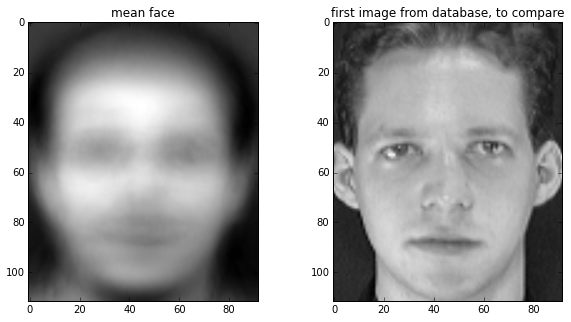

In [24]:
face_aver = faces.mean(axis = 1)
F_aver = np.reshape(face_aver,(dim2,dim1))
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(F_aver,cmap = 'gray')
ax[0].set_title('mean face')
ax[1].imshow(F1,cmap = 'gray')
ax[1].set_title('first image from database, to compare')


Calculating SVD

In [54]:
def truncation(u,s,v,r):
    u_r = u[:, :r]
    s_r = s[:r]
    v_r = v[:r, :] 
    W_r = np.diag(s_r).dot(v_r)
    return u_r,W_r
    

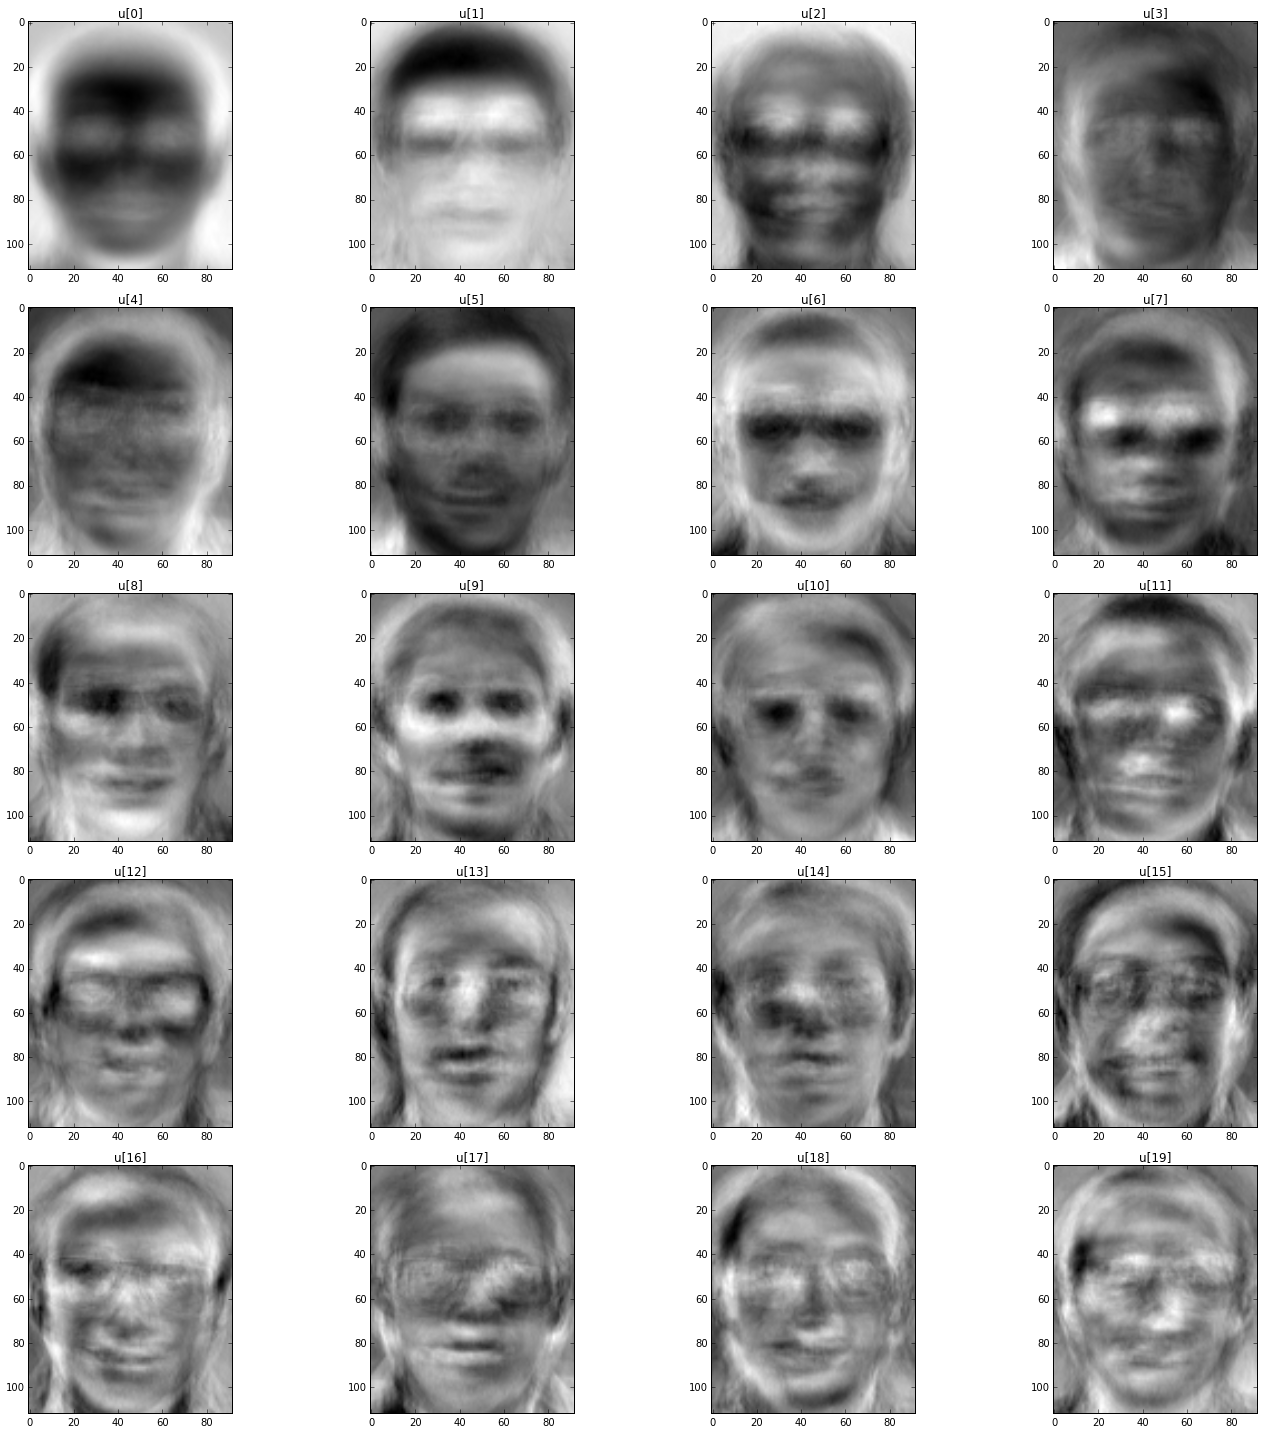

In [55]:
u, s, v = np.linalg.svd(faces, full_matrices=False)
r = 20
u_r,W_r = truncation(u,s,v,r)
fig, ax = plt.subplots(r/4, 4, figsize=(20, 20))
for i in range(r):
    ax[(i) / 4, (i) % 4].imshow(np.reshape(u[:,i],(dim2,dim1)),cmap = 'gray')
    ax[(i) / 4, (i) % 4].set_title('u[{}]'.format(i))
fig.tight_layout()

Importing the rest of images

In [56]:
test_faces = np.zeros((dim1*dim2,40))
for i in xrange(1,41):
        F = Image.open('faces/s{}/10.pgm'.format(i))
        F = np.reshape(F,F.size[0]*F.size[1])
        test_faces[:,i-1] = F[:]

In [57]:
def cos_similarity(x,y):
    sim = np.inner(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return sim

In [75]:
ranks = [5,15,20,25,30,40,45,50,60]
S = np.zeros((40,360))
Number_of_misc = np.zeros(len(ranks),)
for n,r in enumerate(ranks):
    u_r,W_r = truncation(u,s,v,r)
    W_test = u_r.T.dot(test_faces)
    for i in xrange(40):
        for j in xrange(360):
            S[i,j] = 1 - cos_similarity(W_test[:,i],W_r[:,j])
    Match = np.argmin(S,axis = 1)/9
    for k in xrange(len(Match)):
        if Match[k] != k:
            Number_of_misc[n] += 1
for i in xrange(len(ranks)):
    print 'r = {},n = {}'.format(ranks[i],Number_of_misc[i].astype(np.int64))

r = 5,n = 12
r = 15,n = 3
r = 20,n = 3
r = 25,n = 3
r = 30,n = 2
r = 40,n = 2
r = 45,n = 2
r = 50,n = 2
r = 60,n = 2
